In [ ]:
!pip install tensorflow keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def segnet(input_shape=(256, 256, 3), num_classes=4):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    pool1 = x

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(pool1)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    pool2 = x

    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(pool2)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    pool3 = x

    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(pool3)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    pool4 = x

    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(pool4)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    pool5 = x

    # Decoder
    x = layers.UpSampling2D((2, 2))(pool5)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)

    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(x)

    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)

    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)

    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)

    # Output layer
    outputs = layers.Conv2D(num_classes, (1, 1), padding='same', activation='softmax')(x)

    # Creating model
    model = models.Model(inputs, outputs)
    return model

# Instantiating and compiling the model
input_shape = (256, 256, 3)  # input shape
num_classes = 4  # Binary segmentation for lane detection

model = segnet(input_shape=input_shape, num_classes=num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 31,787,204 (121.26 MB)

 Trainable params: 31,787,204 (121.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#mounting my google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_data(image_dir, label_dir, img_size=(256, 256)):
    images = []
    labels = []

    for img_name in os.listdir(image_dir):
        # Loading and preprocessing the images
        img_path = os.path.join(image_dir, img_name)
        label_name = img_name.replace(".jpg", ".png")
        label_path = os.path.join(label_dir, label_name)
        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img)

        # Loading and preprocessing the corresponding labels
        label = load_img(label_path, target_size=img_size, color_mode="grayscale")
        label = img_to_array(label)
        #Ensuring label values are within the valid range
        label = np.clip(label, 0, num_classes - 1)
        labels.append(label)

    return np.array(images), np.array(labels)

# dataset path
image_dir = '/content/drive/MyDrive/new_data'
label_dir = '/content/drive/MyDrive/new_data_labels'
img_size = (256, 256)

images, labels = load_data(image_dir, label_dir, img_size)


In [ ]:
from tensorflow.keras.utils import to_categorical

def preprocess_labels(labels, num_classes):
    # Reshaping labels to be 2D
    labels = labels.reshape(-1, labels.shape[1], labels.shape[2])

    # One-hot encoding the labels
    labels = to_categorical(labels, num_classes=num_classes)

    # Reshaping to add back the channel dimension
    labels = labels.reshape(labels.shape[0], labels.shape[1], labels.shape[2], num_classes)
    return labels

# binary segmentation for lane detection
num_classes = 4
labels = preprocess_labels(labels, num_classes)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Verifying the shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (943, 256, 256, 3) (943, 256, 256, 4)
Testing data shape: (236, 256, 256, 3) (236, 256, 256, 4)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 151s 5s/step - accuracy: 0.8486 - loss: 232.7035 - val_accuracy: 0.9723 - val_loss: 0.3995
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.9723 - loss: 0.2586 - val_accuracy: 0.9723 - val_loss: 0.1672
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.9730 - loss: 0.1614 - val_accuracy: 0.9723 - val_loss: 0.1547
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - accuracy: 0.9731 - loss: 0.1506 - val_accuracy: 0.9723 - val_loss: 0.1467
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.9731 - loss: 0.1518 - val_accuracy: 0.9723 - val_loss: 0.1553
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.9731 - loss: 0.1493 - val_accuracy: 0.9723 - val_loss: 0.1517
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.9726 - loss: 0.1459 - val_accuracy: 0.9723 - val_loss: 0.1366
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.9730 - loss: 0.1389 - val_accuracy: 0

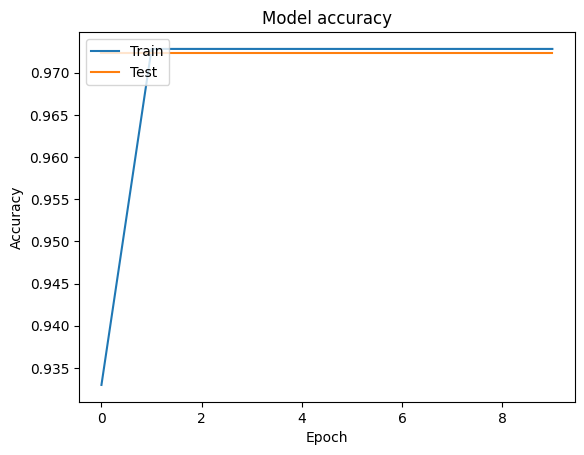

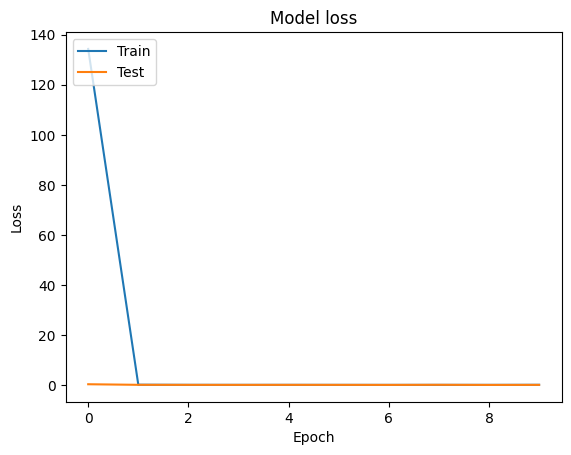

In [ ]:
# Train the model
batch_size = 64
epochs = 10

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test)
)

# Plot the training history if needed
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Evaluating the model
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score
def compute_metrics(y_true, y_pred, num_classes):
    # Flattening the arrays
    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    # Calculating metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    iou = jaccard_score(y_true, y_pred, average='macro')

    return accuracy, precision, recall, f1, iou

# Predicting on the test data
y_pred = model.predict(X_test)

# Converting predictions to class labels
y_pred = np.argmax(y_pred, axis=-1)
y_test_true = np.argmax(y_test, axis=-1)

# Computing metrics
accuracy, precision, recall, f1, iou = compute_metrics(y_test_true, y_pred, num_classes)

# Printing metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'IoU: {iou:.4f}')


8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 540ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9723
Precision: 0.9454
Recall: 0.9723
F1 Score: 0.9587
IoU: 0.9454


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.9726 - loss: 0.1447
Test Loss: 0.14627164602279663
Test Accuracy: 0.9723063707351685
